---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Assignment 1: **Edvin Berberovic s3722163**</font></div>
---

# Load dataset to Python Notebook

Handle necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read in required data

In [2]:
hospitalFrame = pd.read_csv('./train_data.csv', delimiter=',')

Here we drop unecessary bits of data to clean the csv.

In [3]:
hospitalFrame = hospitalFrame.drop(['ID', 'HealthServiceArea'], axis=1)

Printing the data to check for any issues

In [4]:
print(hospitalFrame)

      Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0          F              Other Race         Newborn               228   
1          M  Black/African American         Newborn               228   
2          M              Other Race         Newborn               220   
3          F              Other Race         Newborn                 0   
4          F              Other Race         Newborn               228   
...      ...                     ...             ...               ...   
59961      M  Black/African American         Newborn               115   
59962      M                   White         Newborn               115   
59963      M                   White         Newborn               115   
59964      M                   White         Newborn                -1   
59965      F                   White         Newborn               231   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                             1      

We can already identify several points in the data that may pose an issue due to being categorical e.g. Race, PaymentTypology and so on. First we will examine the data as-is before we handle any pre-processing.

In [5]:
hospitalFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


# Exploratory Data Analysis (EDA)

Often the first step in developing a machine learning solution for a given dataset is the EDA. EDA refers to the critical process of performing initial investigations on data so as to:
 - Maximize insight into a data set;
 - Uncover underlying structure;
 - Extract important variables;
 - Detect outliers and anomalies;
 - Test underlying assumptions;
 - Develop parsimonious models; and
 - Determine optimal factor settings.
 
with the help of summary statistics and graphical representations. The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

- Plotting the raw data (such as data traces, histograms, bi-histograms, probability plots, lag plots, block plots, and Youden plots.
- Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
- Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.


In [6]:
hospitalFrame.shape

(59966, 14)

Here we can see that the data is currently organised into 14 columns of params and 59966 rows of data.

In [7]:
hospitalFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

There are no issues with the data info, all types are non-null and there are 14 columns which matches the dataframe's shape.

In [8]:
hospitalFrame.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


We can see that running a .descibe() call results in missing columns of data. This is because of categorical data within the frame. We will clean this up after initial checks

1. Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

    * Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars. 

    * Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.
 
2. Numerical Variables: These are variables which are numerical in nature

    * Continuous Variables: Take on a continuous values (no breaks). For example, height, weight.

    * Discrete numerical variables take on a set of values which can be counted. For example, the number of rooms in a house.

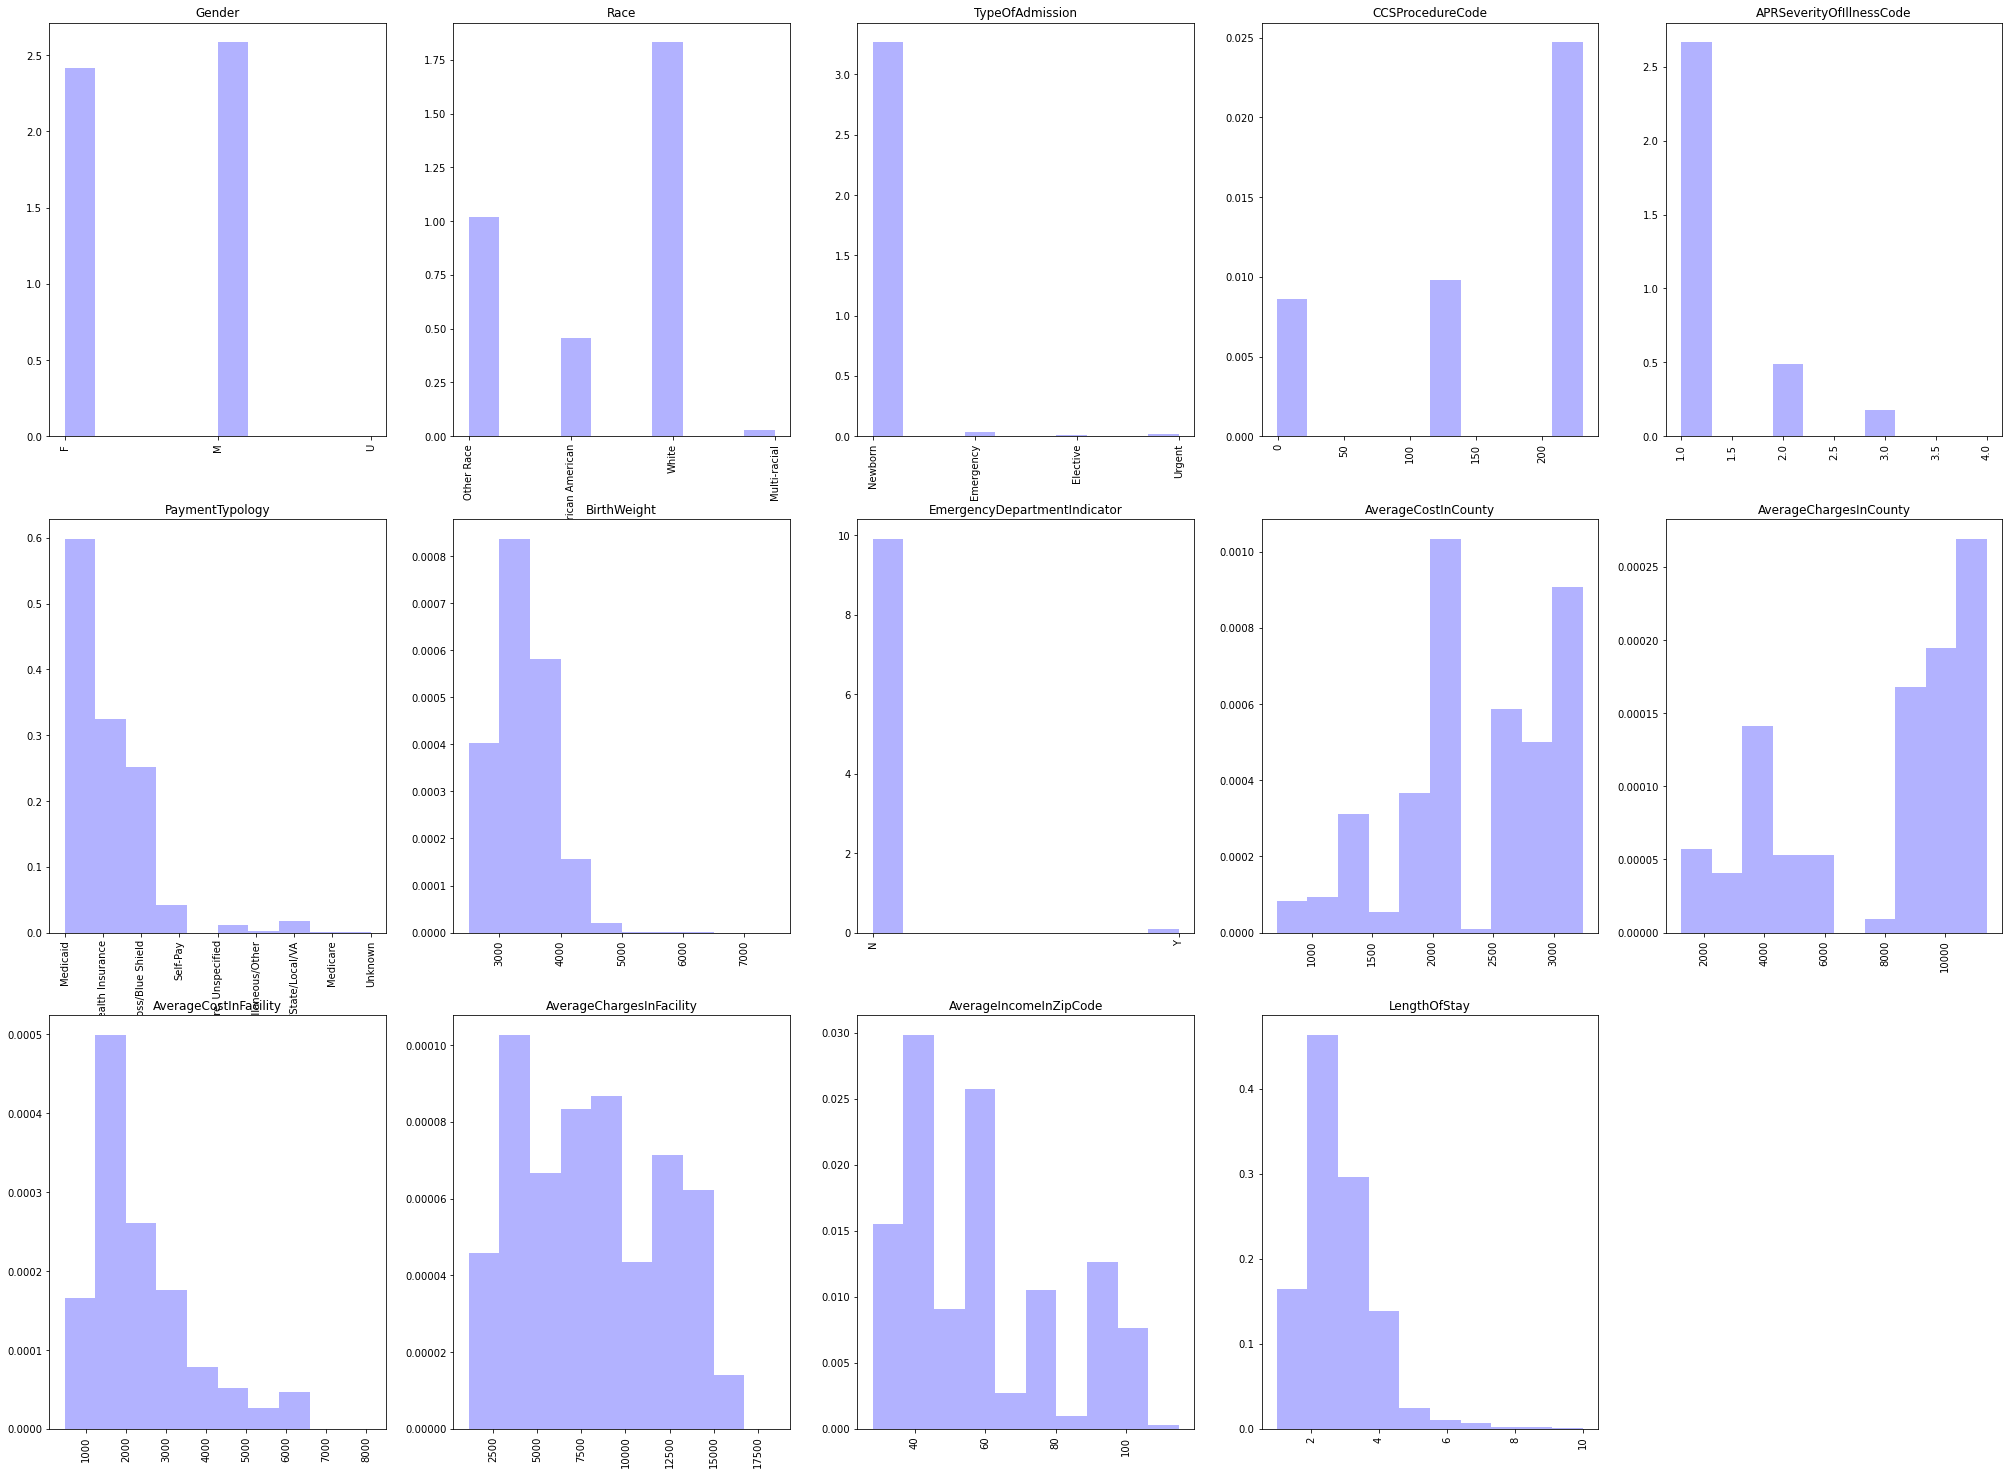

In [9]:
plt.figure(figsize=(35,35))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(4,5,i+1)
    plt.hist(hospitalFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Attribute Gender is a categorical variable, split into Male, Female and U which must be further investigated 
> - Attribute Race is a categorical variable
> - Attribute TypeOfAdmission is a categorical variable
> - Attribute PaymentTypology is a categorical variable

## Relationship between variables

In the previous section we observed each attribute (data column) independently. Sometimes it is also useful to observe the relationship between two variables. There are several techniques that we can use for this purpose. One of the key techniques is a scatter plot. 

Since our task is to predict LengthOfStay (target variable) using all other attributes, let's plot the relationship between LengthOfStay and other columns.

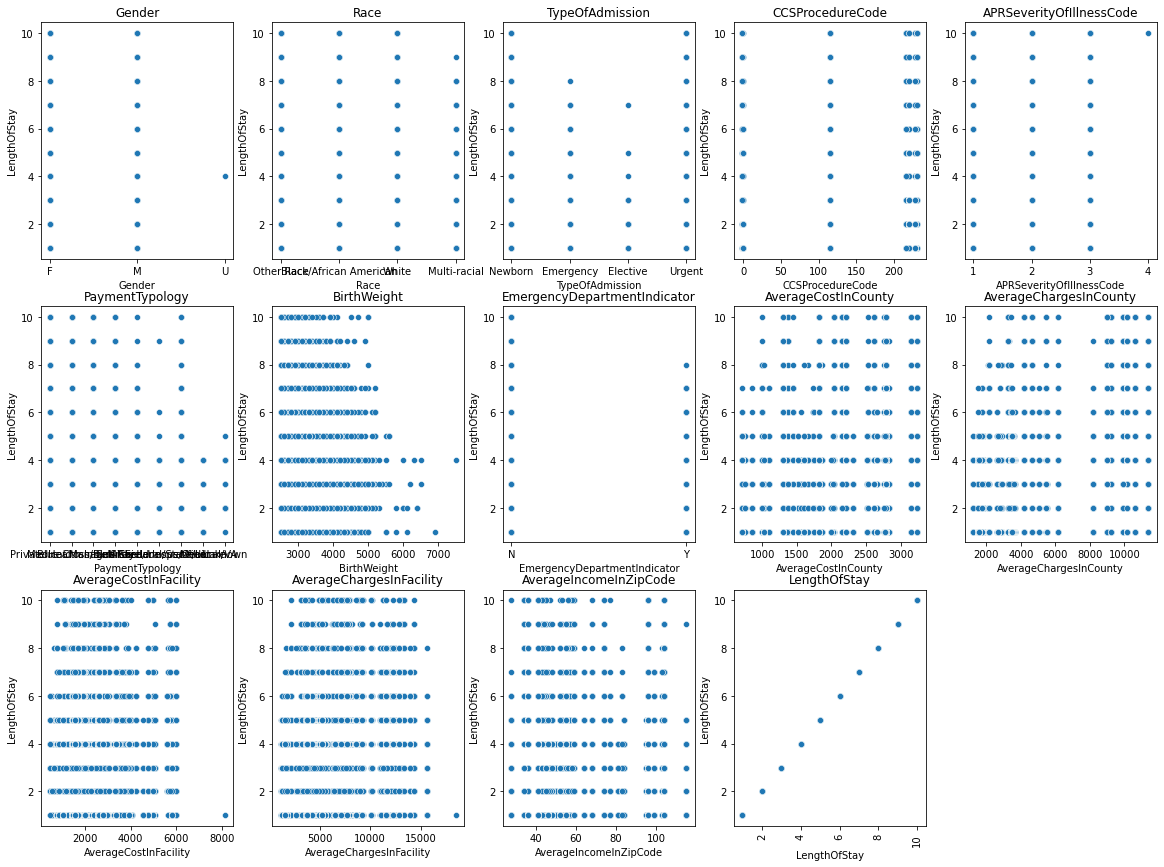

In [10]:
import seaborn as sns
plt.figure(figsize=(20,20))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(4,5,i+1)
    sns.scatterplot(data=hospitalFrame, x=col, y='LengthOfStay')
    # sns.regplot(x=col,y='LengthOfStay', data=hospitalFrame)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

Looking at the relationship between each point of data and LengthOfStay we can see that there are many points of categorical data impacting our analysis, adjustments will have to be made to progress. At this stage a tree based approach seems best as the data is not linear or polynomial

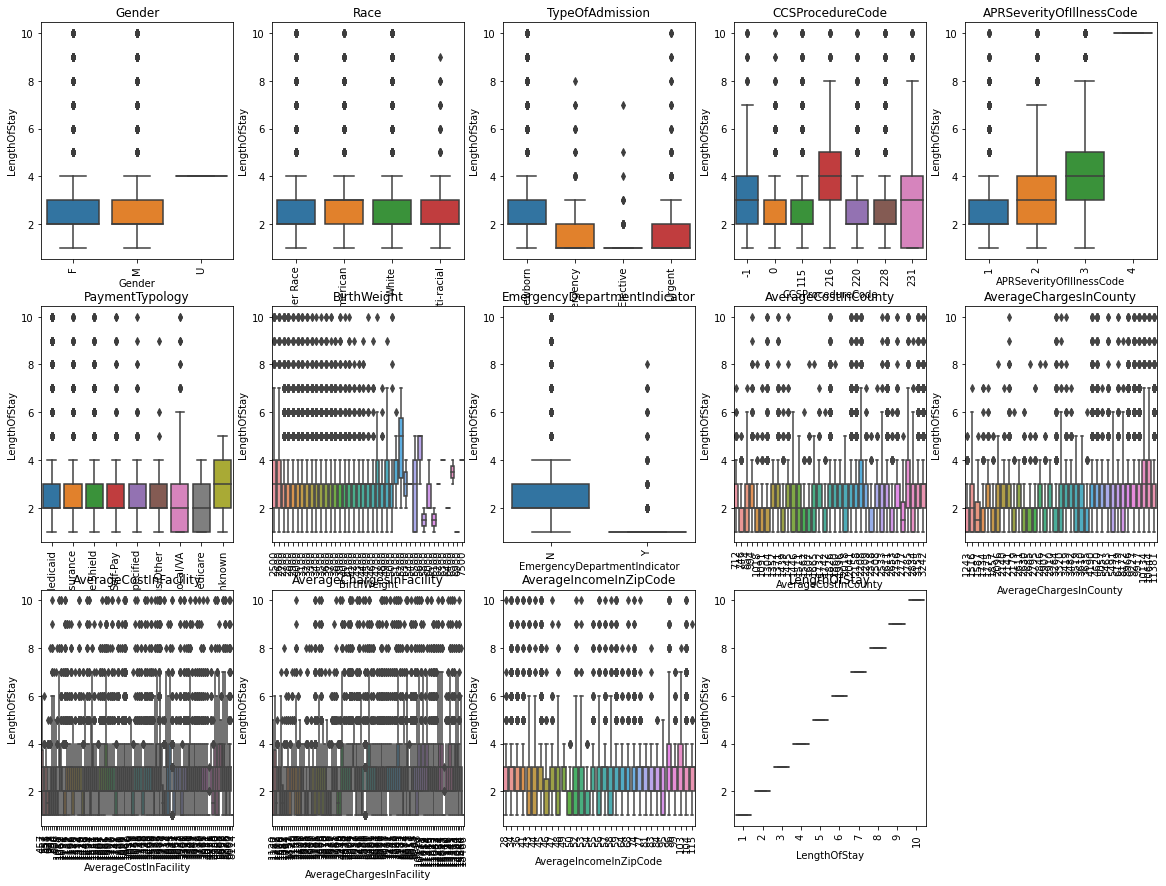

In [11]:
plt.figure(figsize=(20,20))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(4,5,i+1)
    ax = sns.boxplot(y='LengthOfStay',x=col,data=hospitalFrame)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    # sns.regplot(x=col,y='LengthOfStay', data=hospitalFrame)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

Doing a box plot analysis helps visualise the categorical data, we can see that factors like gender and race have no impact but CCSProcedureCode and TypeofAdmission do

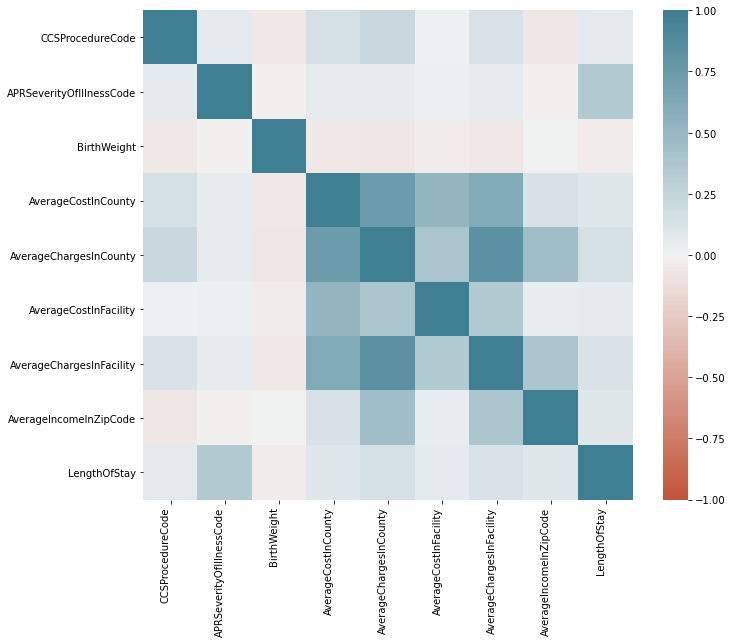

In [12]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = hospitalFrame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

Using a heatmap with only non-categorical data we can see that there is a low impact from 'average' based columns and APRSeverityOfIllnessCode having the greatest impact.

# Data Pre-processing (or Transforming)

The data read frm the train_data set has many categorical points of data which affect our ability to analyse the data and provide it to a learning model. We will clean the data up.

1. Cleaning data & Removing/filling missing values.
2. Encoding data
3. Feature scaling


## Encoding Categorical data

Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

- Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars. 

- Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.


In [13]:
hospitalFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


Examining Columns further for categorical data.

In [14]:
print(set((hospitalFrame['Gender'])))

{'F', 'U', 'M'}


This is a variable that cannot be put in any logical order, even represented as number it cannot be compared against itself for weighting. We will split Gender into seperate enumerated categories.

A common approach is called one hot encoding. The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. We will hot encode the genders into their true or false values.

In [15]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_Gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Gender.fit(hospitalFrame[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(hospitalFrame[['Gender']]).toarray()

print(onehot_.shape, OneHotEncoder_Gender.categories_)

(59966, 3) [array(['F', 'M', 'U'], dtype=object)]


We can see that the `Gender` column is now converted to 3 columns. The first column will say if the Gender is Male or not, then the next Female or not and so on. 

Now we can put these columns back to the dataframe.

In [16]:
colName = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0


Now we have three extra columns. compare them with the original 'Gender' column and see if it matches.

Since we have represented the 'Gender' column with the three new columns, we should remove the original column to eliminate redundancy.

In [17]:
hospitalFrame = hospitalFrame.drop(['Gender'], axis=1)
hospitalFrame.head()

,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U
0,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0
1,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0
2,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0
3,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0
4,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0


In [18]:
print(set((hospitalFrame['Race'])))

{'Other Race', 'White', 'Multi-racial', 'Black/African American'}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [19]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Race.fit(hospitalFrame[['Race']])

onehot_ = OneHotEncoder_Race.transform(hospitalFrame[['Race']]).toarray()

print(onehot_.shape, OneHotEncoder_Race.categories_)

(59966, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]


We can see that the `Race` column is now converted to 4 columns.

Now we can put these columns back to the dataframe.

In [20]:
colName = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
hospitalFrame = hospitalFrame.drop(['Race'], axis=1)
hospitalFrame.head()

,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
print(set((hospitalFrame['CCSProcedureCode'])))

{0, 228, 231, 115, 216, 220, -1}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [23]:
OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_CCSProcedureCode.fit(hospitalFrame[['CCSProcedureCode']])

onehot_ = OneHotEncoder_CCSProcedureCode.transform(hospitalFrame[['CCSProcedureCode']]).toarray()

print(onehot_.shape, OneHotEncoder_CCSProcedureCode.categories_)

(59966, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]


We can see that the `CCSProcedureCode` column is now converted to 7 columns.

Now we can put these columns back to the dataframe.

In [24]:
colName = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,...,Race_Multi-racial,Race_Other Race,Race_White,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
hospitalFrame = hospitalFrame.drop(['CCSProcedureCode'], axis=1)
hospitalFrame.head()

,TypeOfAdmission,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,Race_Multi-racial,Race_Other Race,Race_White,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,Newborn,1,Medicaid,3700,N,2611,9227,1751,8951,45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,1,Medicaid,2900,N,3242,8966,3338,6409,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Newborn,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Newborn,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Newborn,1,Medicaid,2600,N,2611,9227,6000,14344,59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
print(set((hospitalFrame['TypeOfAdmission'])))

{'Newborn', 'Elective', 'Emergency', 'Urgent'}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [27]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_TypeOfAdmission.fit(hospitalFrame[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(hospitalFrame[['TypeOfAdmission']]).toarray()

print(onehot_.shape, OneHotEncoder_TypeOfAdmission.categories_)

(59966, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


We can see that the `TypeOfAdmission` column is now converted to 4 columns.

Now we can put these columns back to the dataframe.

In [28]:
colName = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,TypeOfAdmission,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent
0,Newborn,1,Medicaid,3700,N,2611,9227,1751,8951,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,1,Medicaid,2900,N,3242,8966,3338,6409,34,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Newborn,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Newborn,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Newborn,1,Medicaid,2600,N,2611,9227,6000,14344,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [29]:
hospitalFrame = hospitalFrame.drop(['TypeOfAdmission'], axis=1)
hospitalFrame.head()

,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,...,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent
0,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
print(set((hospitalFrame['PaymentTypology'])))

{'Federal/State/Local/VA', 'Private Health Insurance', 'Managed Care, Unspecified', 'Miscellaneous/Other', 'Self-Pay', 'Unknown', 'Medicaid', 'Blue Cross/Blue Shield', 'Medicare'}


This is a variable that cannot be put in any logical order, even converted into a number we cannot compare them against each other. As such, we will split race into separate columns like the above Gender.

In [31]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_PaymentTypology.fit(hospitalFrame[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(hospitalFrame[['PaymentTypology']]).toarray()

print(onehot_.shape, OneHotEncoder_PaymentTypology.categories_)

(59966, 9) [array(['Blue Cross/Blue Shield', 'Federal/State/Local/VA',
       'Managed Care, Unspecified', 'Medicaid', 'Medicare',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay',
       'Unknown'], dtype=object)]


We can see that the `PaymentTypology` column is now converted to 9 columns.

Now we can put these columns back to the dataframe.

In [32]:
colName = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    hospitalFrame[colName + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]

    
hospitalFrame.head()

,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,...,TypeOfAdmission_Urgent,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
hospitalFrame = hospitalFrame.drop(['PaymentTypology'], axis=1)
hospitalFrame.head()

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,TypeOfAdmission_Urgent,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,N,2611,9227,1751,8951,45,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,N,3242,8966,3338,6409,34,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,N,3155,11381,4980,9323,45,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,N,3155,11381,5826,15680,59,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,N,2611,9227,6000,14344,59,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
print(set((hospitalFrame['EmergencyDepartmentIndicator'])))

{'Y', 'N'}


This is a variable that can be put into a logical numeric. We can assign Y to 1 and N to 0.

In [35]:
hospitalFrame['EmergencyDepartmentIndicator'] = hospitalFrame['EmergencyDepartmentIndicator'].replace('Y', 1)
hospitalFrame['EmergencyDepartmentIndicator'] = hospitalFrame['EmergencyDepartmentIndicator'].replace('N', 0)


In [36]:
print(set((hospitalFrame['EmergencyDepartmentIndicator'])))

{0, 1}


In [37]:
hospitalFrame.head()

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,TypeOfAdmission_Urgent,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,0,2611,9227,1751,8951,45,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,0,3242,8966,3338,6409,34,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,0,3155,11381,4980,9323,45,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,0,3155,11381,5826,15680,59,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,0,2611,9227,6000,14344,59,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
hospitalFrame.loc[(hospitalFrame.LengthOfStay < 4),'LengthOfStay'] = 0
hospitalFrame.loc[(hospitalFrame.LengthOfStay > 3),'LengthOfStay'] = 1
print(set((hospitalFrame['LengthOfStay'])))

{0, 1}


At this stage we have fully processed the data set to remove categorical values. We can now re-evaluate the data to see how it operates. 

In [39]:
hospitalFrame.shape

(59966, 36)

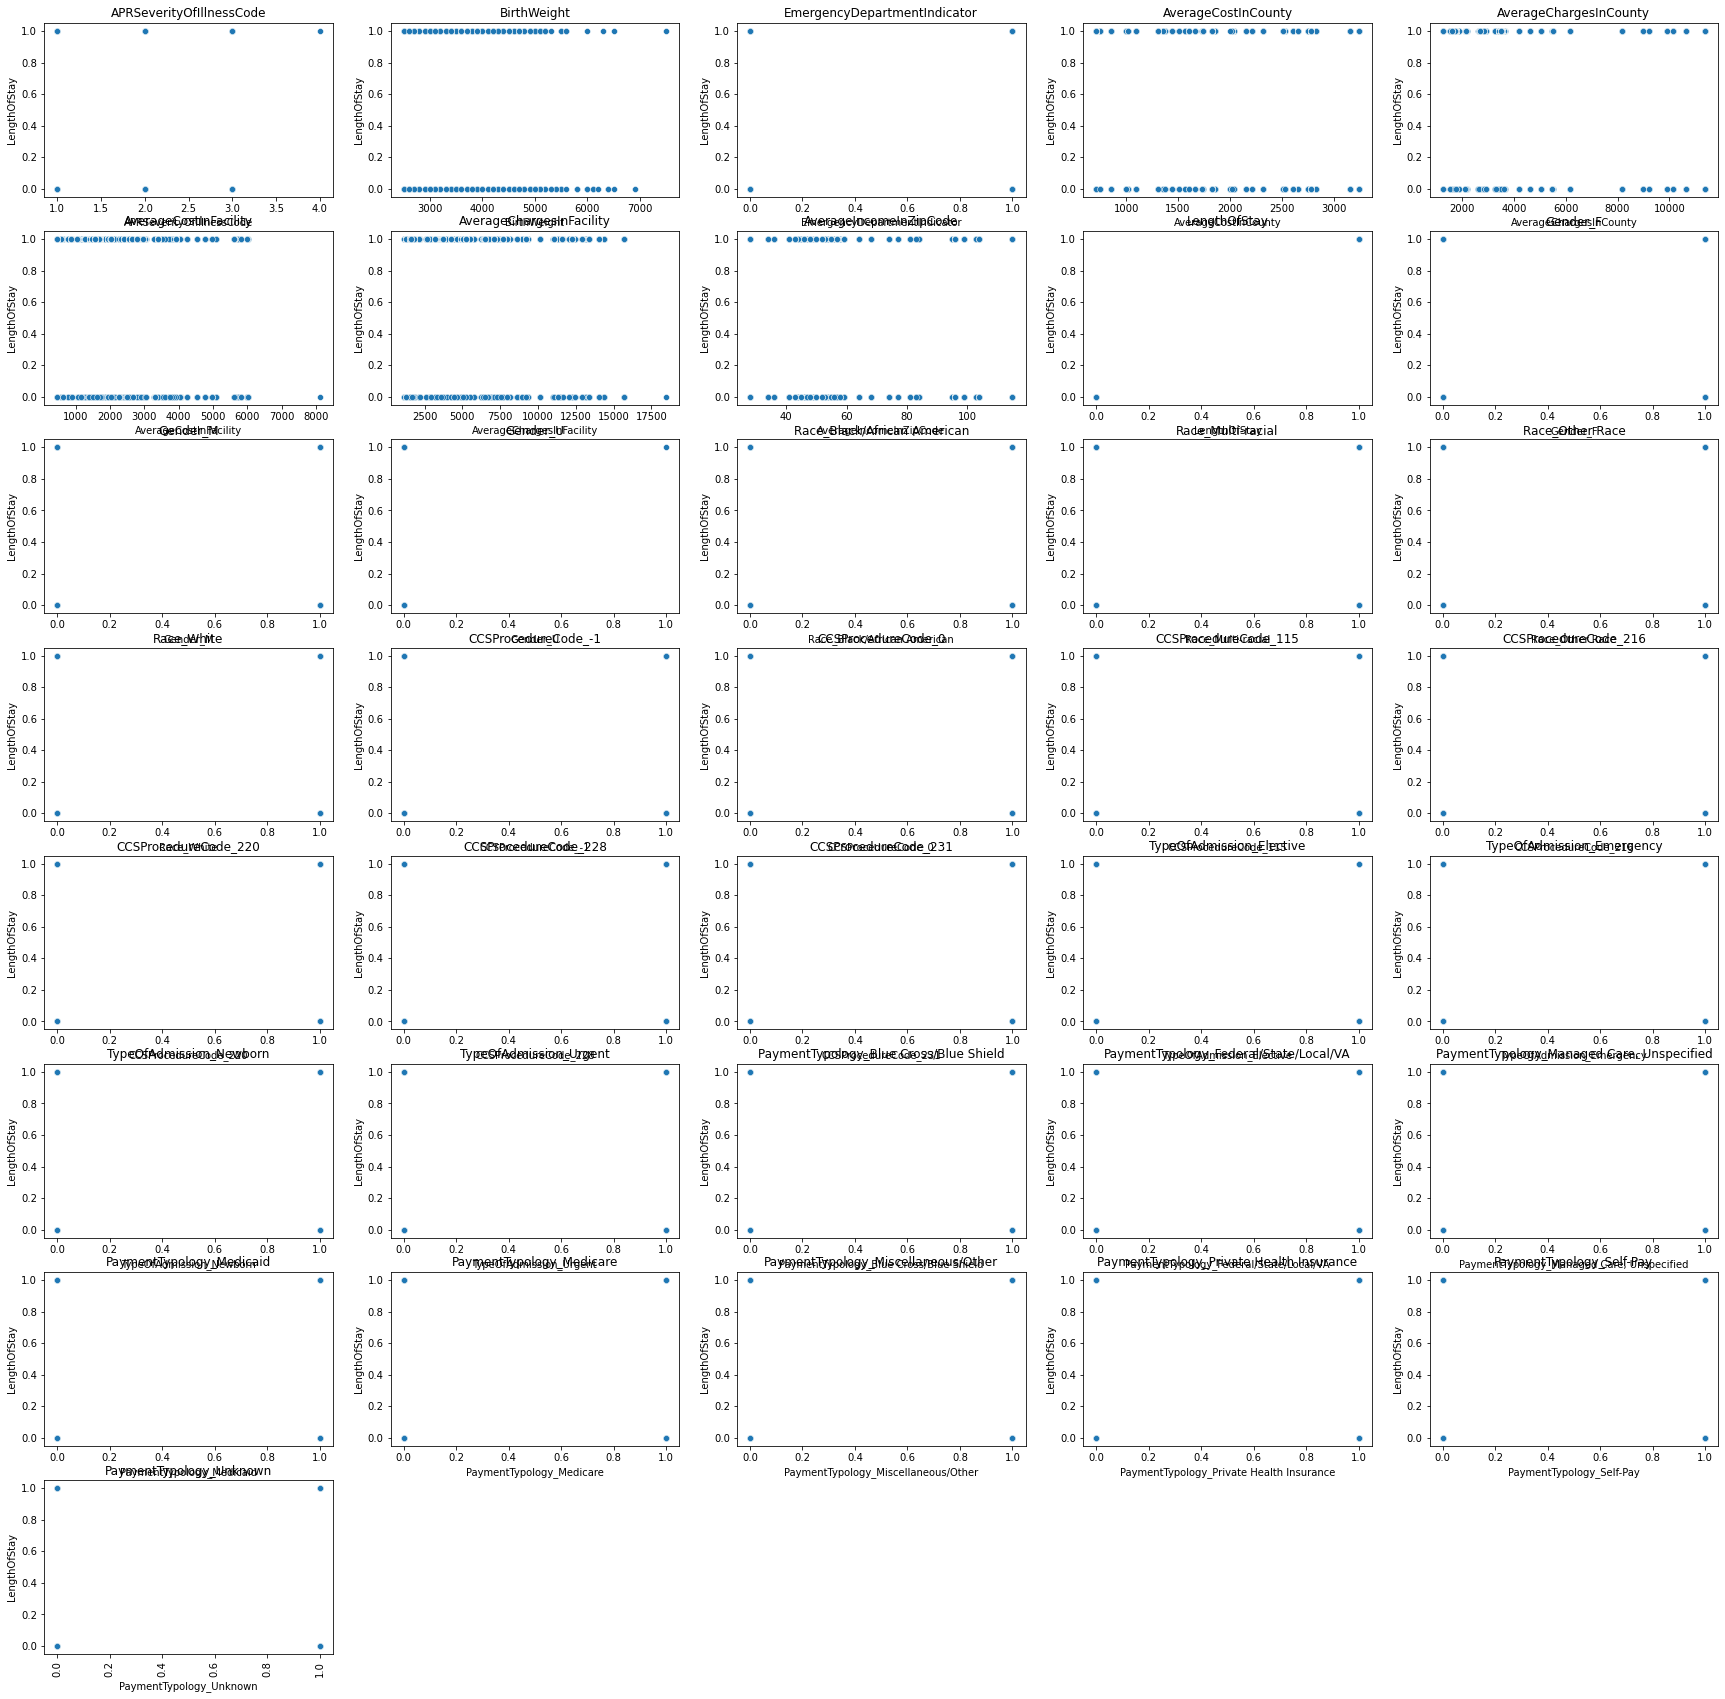

In [40]:
import seaborn as sns
plt.figure(figsize=(30,30))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(8,5,i+1)
    sns.scatterplot(data=hospitalFrame, x=col, y='LengthOfStay')
    # sns.regplot(x=col,y='LengthOfStay', data=hospitalFrame)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

Having processed our data the original hypothesis for tree modelling being best seems proven. All data is fairly binary and can easily fit into a tree model

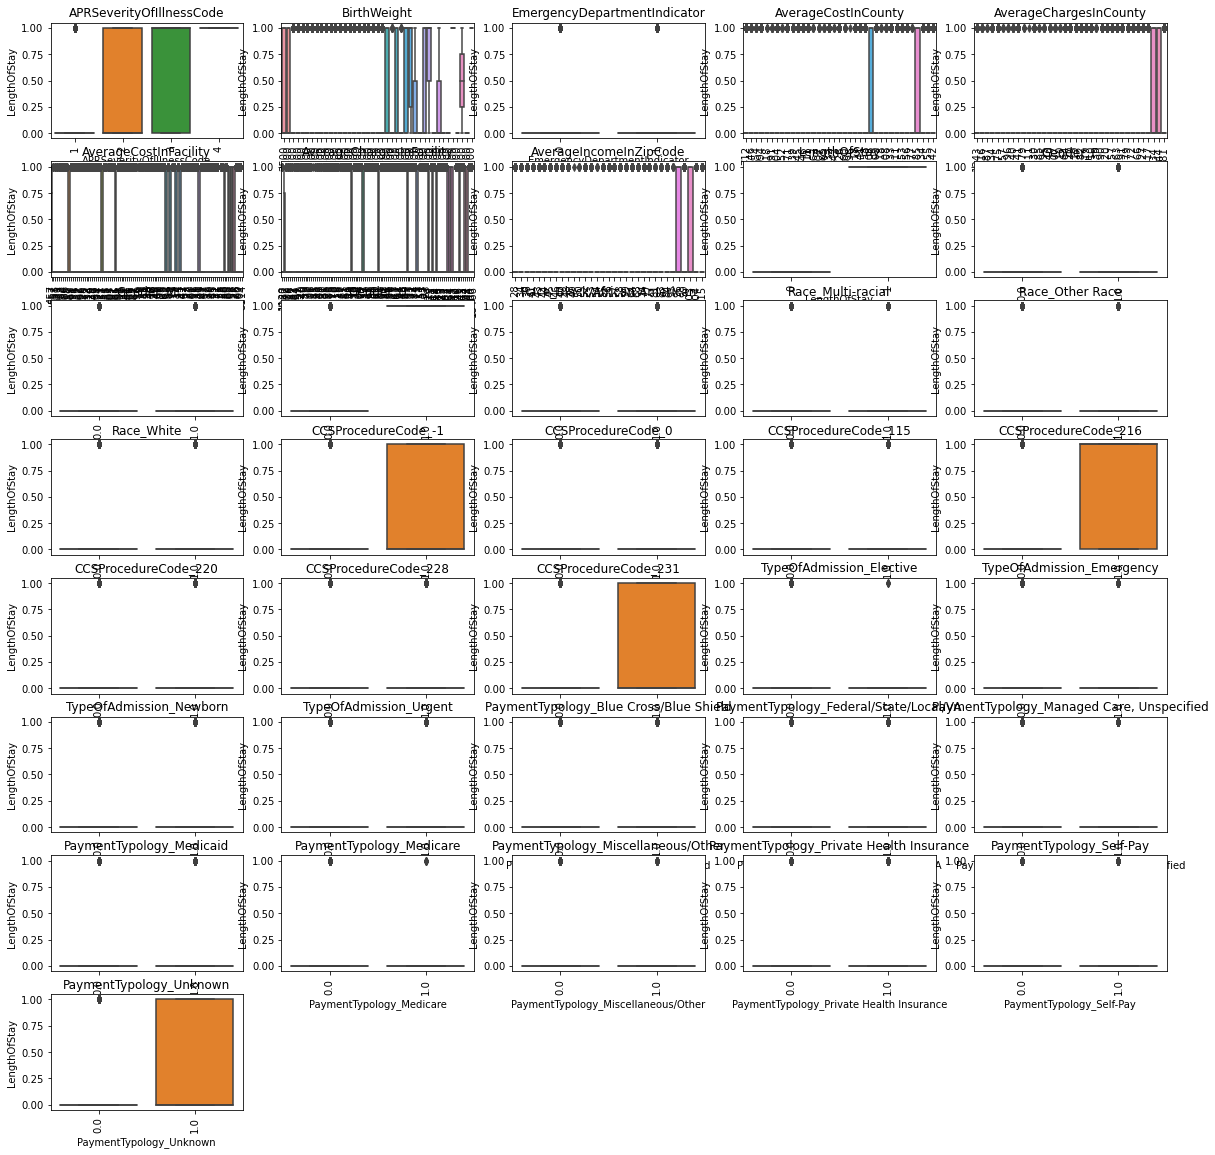

In [41]:
plt.figure(figsize=(20,20))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(8,5,i+1)
    ax = sns.boxplot(y='LengthOfStay',x=col,data=hospitalFrame)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    # sns.regplot(x=col,y='LengthOfStay', data=hospitalFrame)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

We can also see from boxplots that there are certain parameters which have a guaranteed impact on LengthOfStay

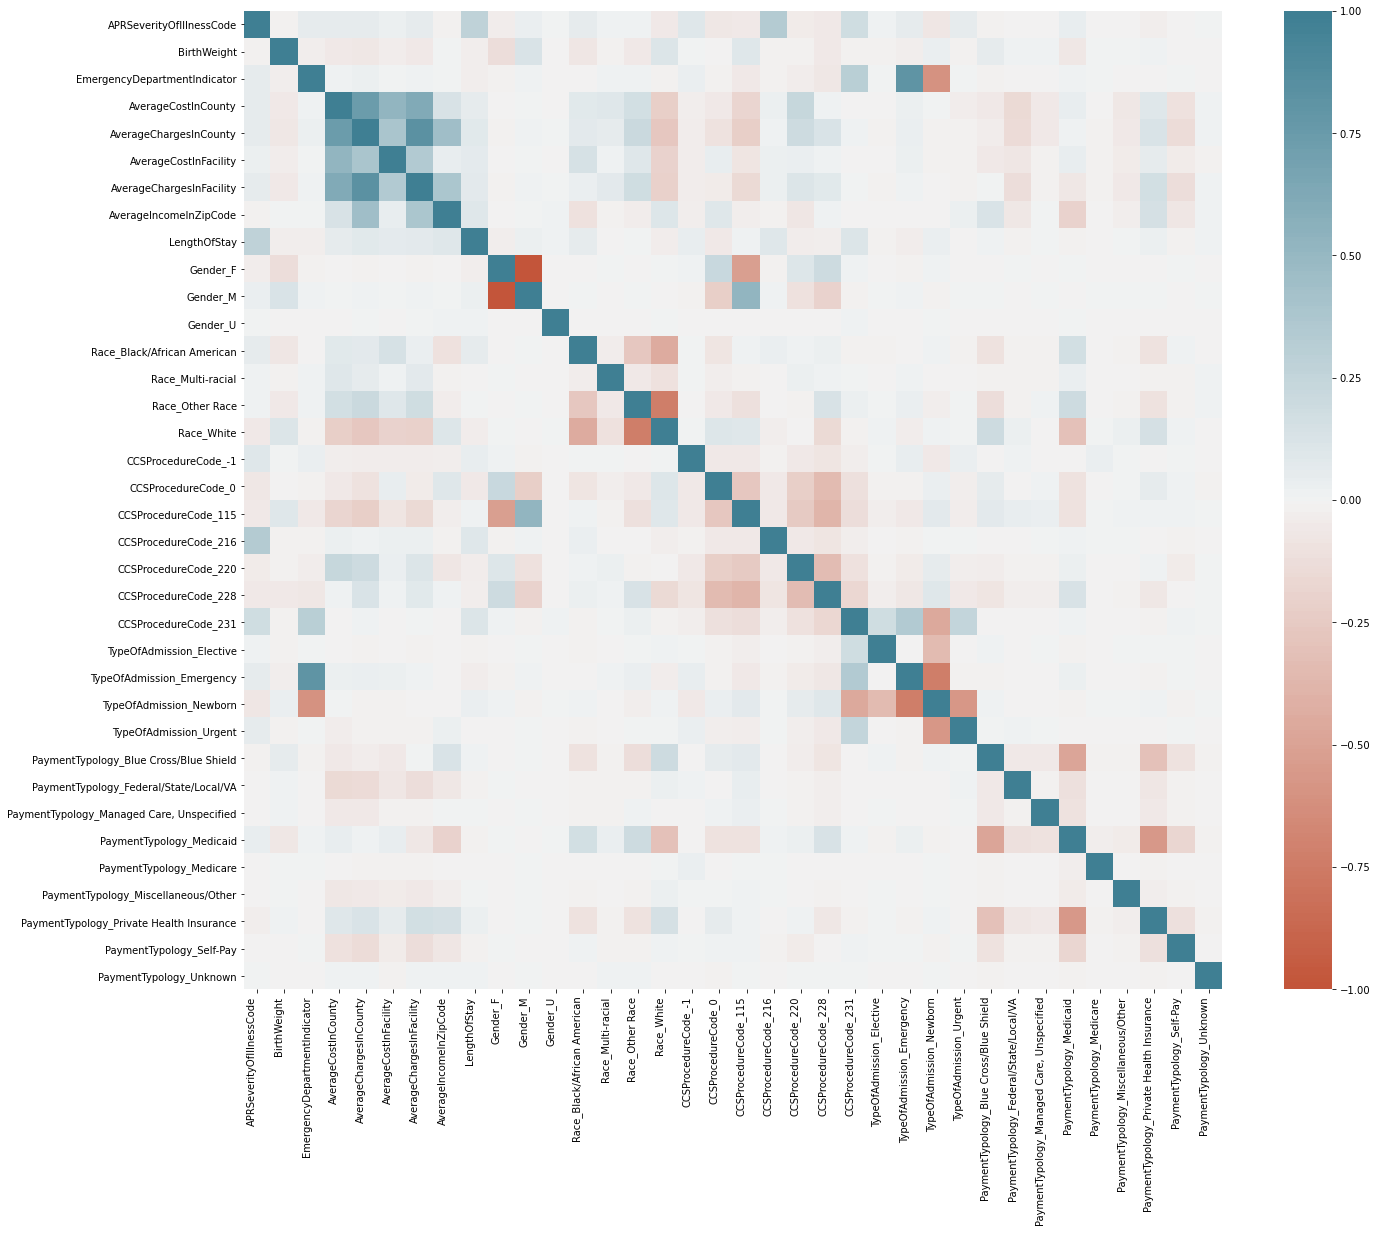

In [42]:
f, ax = plt.subplots(figsize=(22, 18))
corr = hospitalFrame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

From the heatmap we can see several CCSProcedureCodes having some more relevance to LengthOfStay, as well as the 'Average' based columns from before.

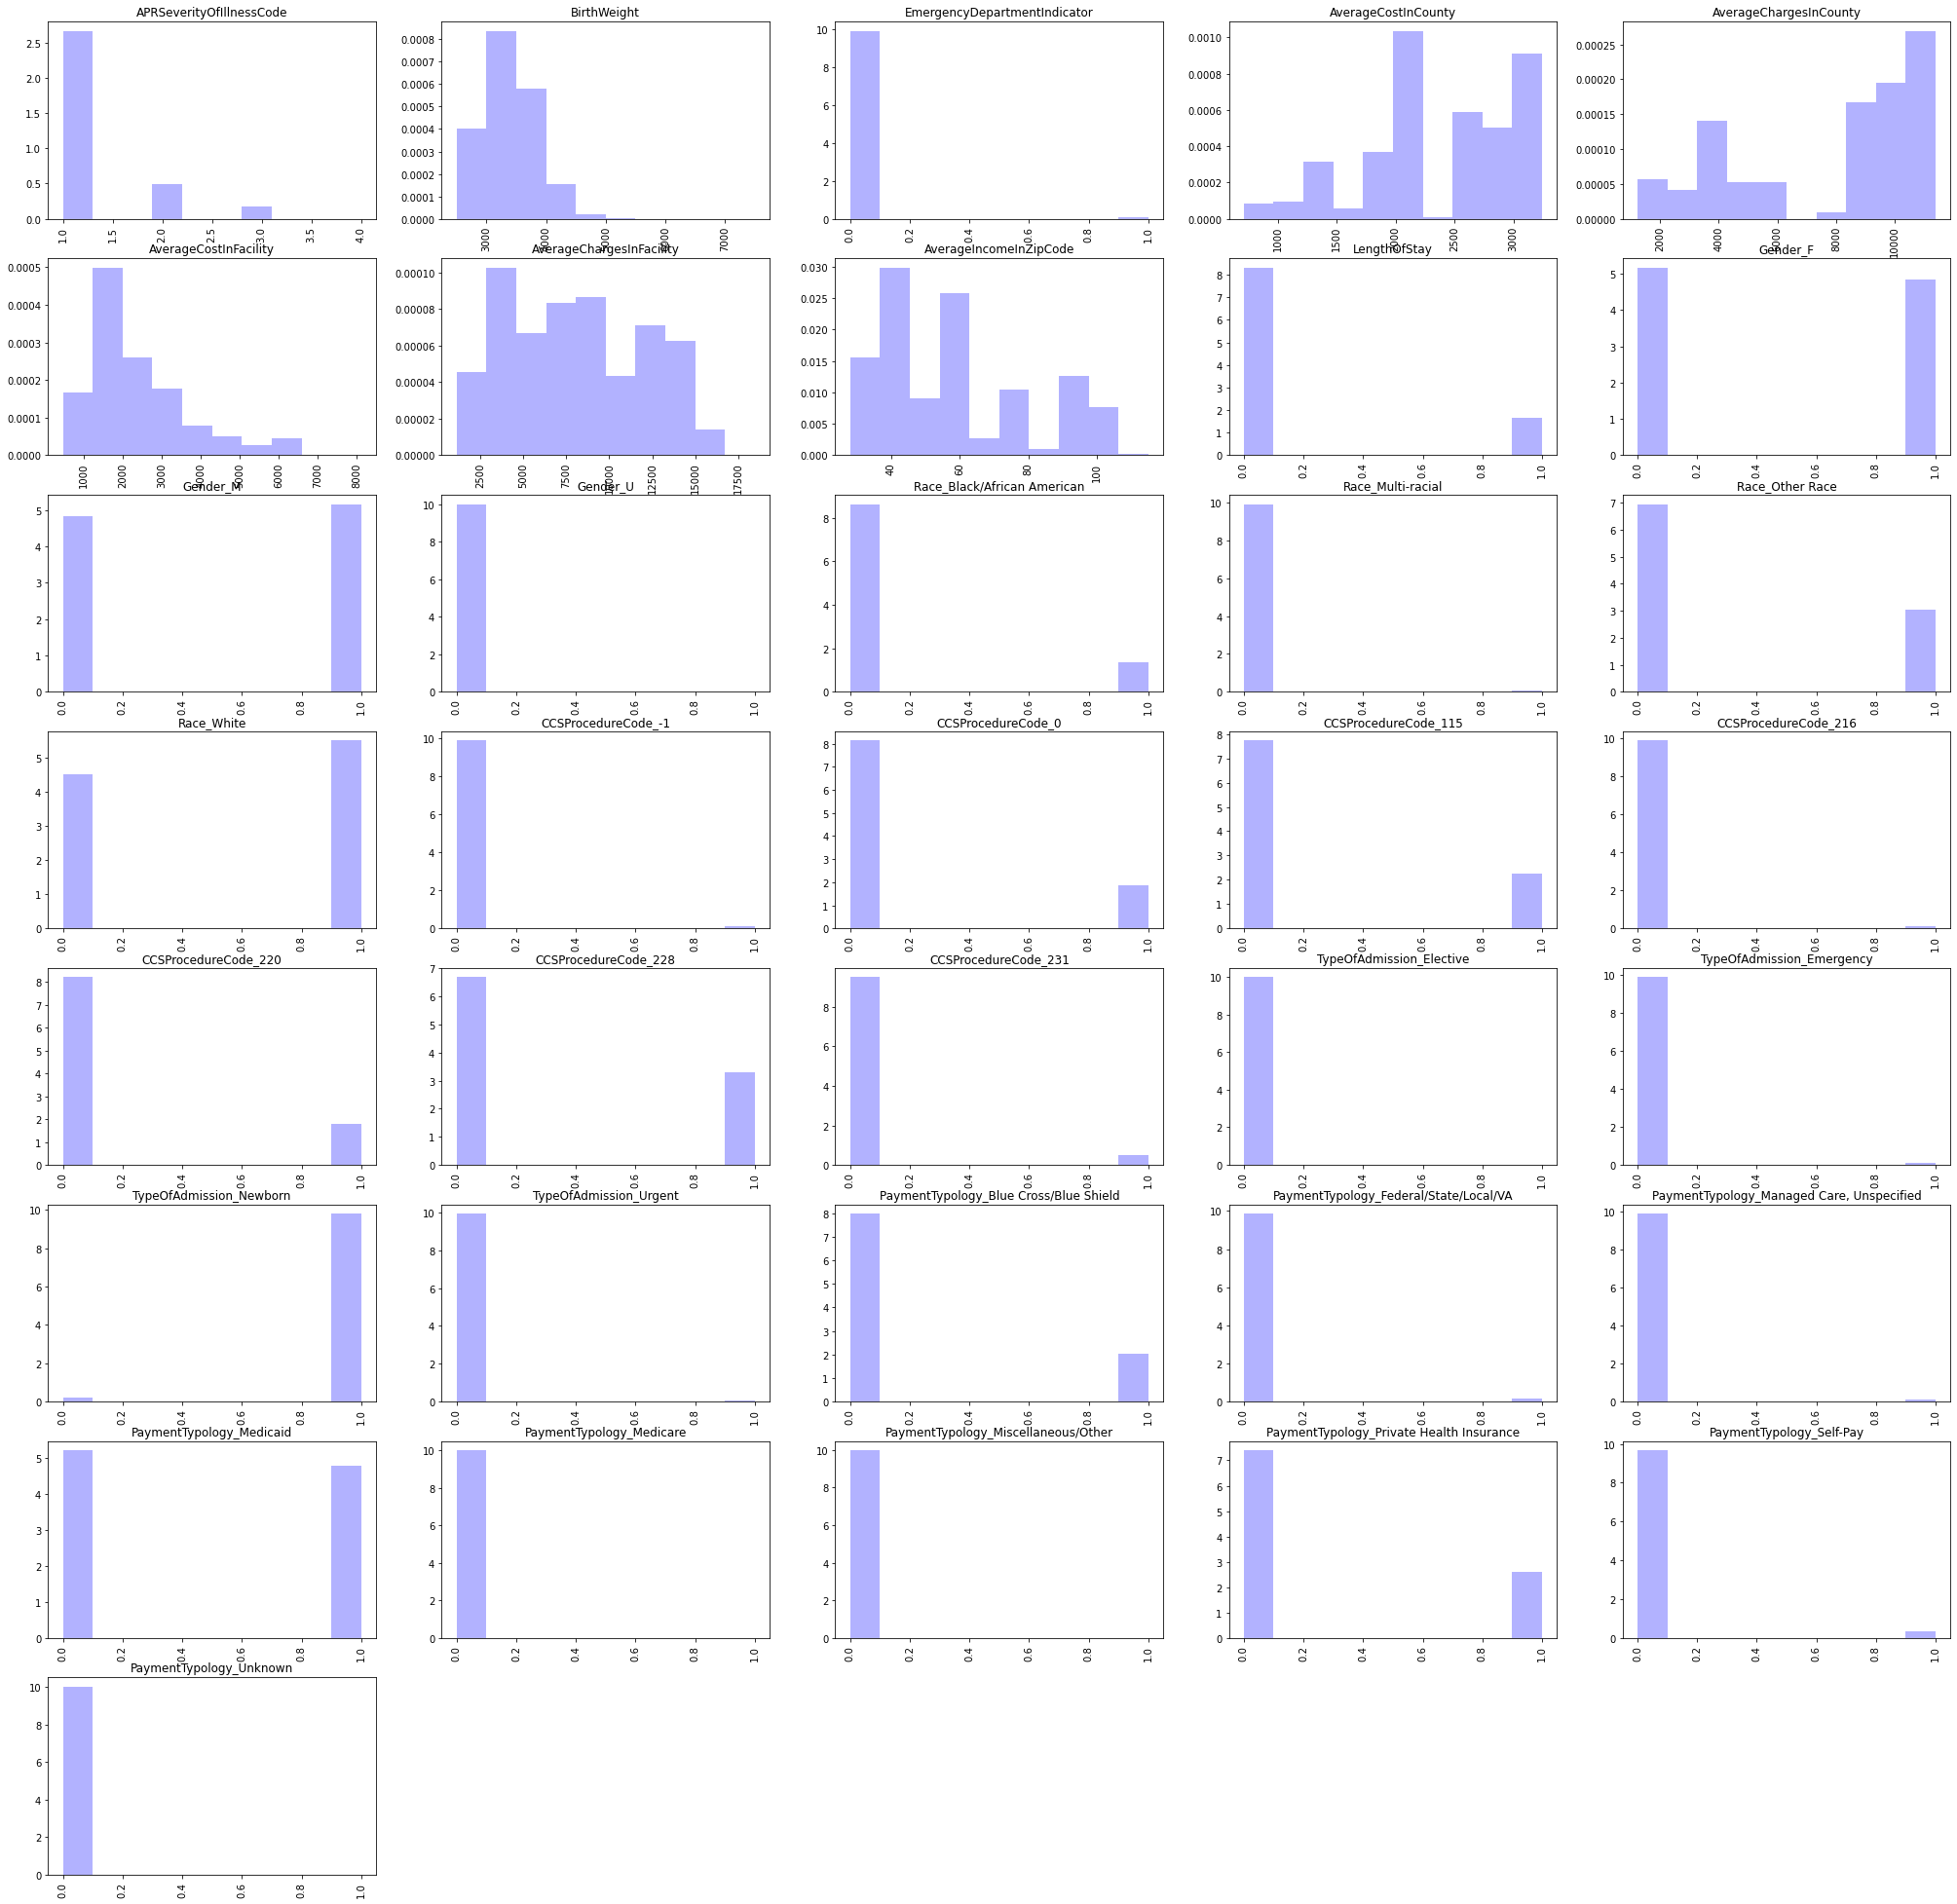

In [43]:
plt.figure(figsize=(35,35))
for i, col in enumerate(hospitalFrame.columns):
    plt.subplot(8,5,i+1)
    plt.hist(hospitalFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

By examining our final plot we can see that AverageCostInFacility, AverageChargesInCounty and APRSeverityOfIllnessCode seem on the exponential growth side. The rest of the values are either binary or standardly distributed. Scaling will be done accordingly.

# Data Splitting and Modelling

First the columns in hospitalFrame will be type labelled into categories. This if for the inverse transformation required on y data.

In [44]:
for col in hospitalFrame.columns:
    if hospitalFrame[col].dtype == object:
        hospitalFrame[col] = hospitalFrame[col].astype('category')

We reset LengthOfStay into a no and yes for the inverse function below.

In [45]:

hospitalFrame.loc[(hospitalFrame.LengthOfStay == 0),'LengthOfStay'] = 'no'
hospitalFrame.loc[(hospitalFrame.LengthOfStay == 1),'LengthOfStay'] = 'yes'
hospitalData_Y = hospitalFrame['LengthOfStay']
print(hospitalData_Y)

0         no
1         no
2         no
3         no
4         no
        ... 
59961    yes
59962    yes
59963    yes
59964    yes
59965    yes
Name: LengthOfStay, Length: 59966, dtype: object


In [46]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(hospitalData_Y)
class_labels = le.inverse_transform([0,1])
hospitalData_Y = le.transform(hospitalData_Y)
print(hospitalData_Y)
print(class_labels)

[0 0 0 ... 1 1 1]
['no' 'yes']


Y data is now appropriately created.

The data will now be split into a training set, testing set and validation set.

In [47]:
hospitalData_X = hospitalFrame.drop(['LengthOfStay'], axis=1)

from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_hospitalData_X_, test_hospitalData_X, train_hospitalData_Y_, test_hospitalData_Y = train_test_split(hospitalData_X, hospitalData_Y, test_size=0.2, 
                                            shuffle=True, random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_hospitalData_X, val_hospitalData_X, train_hospitalData_Y, val_hospitalData_Y = train_test_split(train_hospitalData_X_, train_hospitalData_Y_, test_size=0.25, 
                                            shuffle=True,random_state=0)
    
print(train_hospitalData_X.shape, val_hospitalData_X.shape, test_hospitalData_X.shape)

(35979, 35) (11993, 35) (11994, 35)


Having done our EDA we will run the appropriate scaling. All data will get either powertransformed due to logarithmic nature or minmixscaled.

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['AverageCostInFacility', 'AverageChargesInCounty','APRSeverityOfIllnessCode']
minmax_attributes = list(set(hospitalData_X.columns).difference(set(logNorm_attributes)))

train_scaled_hospitalData_X = train_hospitalData_X.copy()
test_scaled_hospitalData_X = test_hospitalData_X.copy()
val_scaled_hospitalData_X = val_hospitalData_X.copy()

minmaxscaler = MinMaxScaler().fit(train_scaled_hospitalData_X.loc[:, minmax_attributes])
train_scaled_hospitalData_X.loc[:, minmax_attributes] = minmaxscaler.transform(train_scaled_hospitalData_X.loc[:, minmax_attributes])
test_scaled_hospitalData_X.loc[:, minmax_attributes] = minmaxscaler.transform(test_scaled_hospitalData_X.loc[:, minmax_attributes])
val_scaled_hospitalData_X.loc[:, minmax_attributes] = minmaxscaler.transform(val_scaled_hospitalData_X.loc[:, minmax_attributes])

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_scaled_hospitalData_X.loc[:, logNorm_attributes])
train_scaled_hospitalData_X.loc[:, logNorm_attributes] = powertransformer.transform(train_scaled_hospitalData_X.loc[:, logNorm_attributes])
test_scaled_hospitalData_X.loc[:, logNorm_attributes] = powertransformer.transform(test_scaled_hospitalData_X.loc[:, logNorm_attributes])
val_scaled_hospitalData_X.loc[:, logNorm_attributes] = powertransformer.transform(val_scaled_hospitalData_X.loc[:, logNorm_attributes])

minmaxscaler_pt = MinMaxScaler().fit(train_scaled_hospitalData_X.loc[:, logNorm_attributes])
train_scaled_hospitalData_X.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(train_scaled_hospitalData_X.loc[:, logNorm_attributes])
test_scaled_hospitalData_X.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(test_scaled_hospitalData_X.loc[:, logNorm_attributes])
val_scaled_hospitalData_X.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(val_scaled_hospitalData_X.loc[:, logNorm_attributes])

Graphs of each data split will be made and compared against each other to check for disparity between the sets. This is to ensure even distribution.

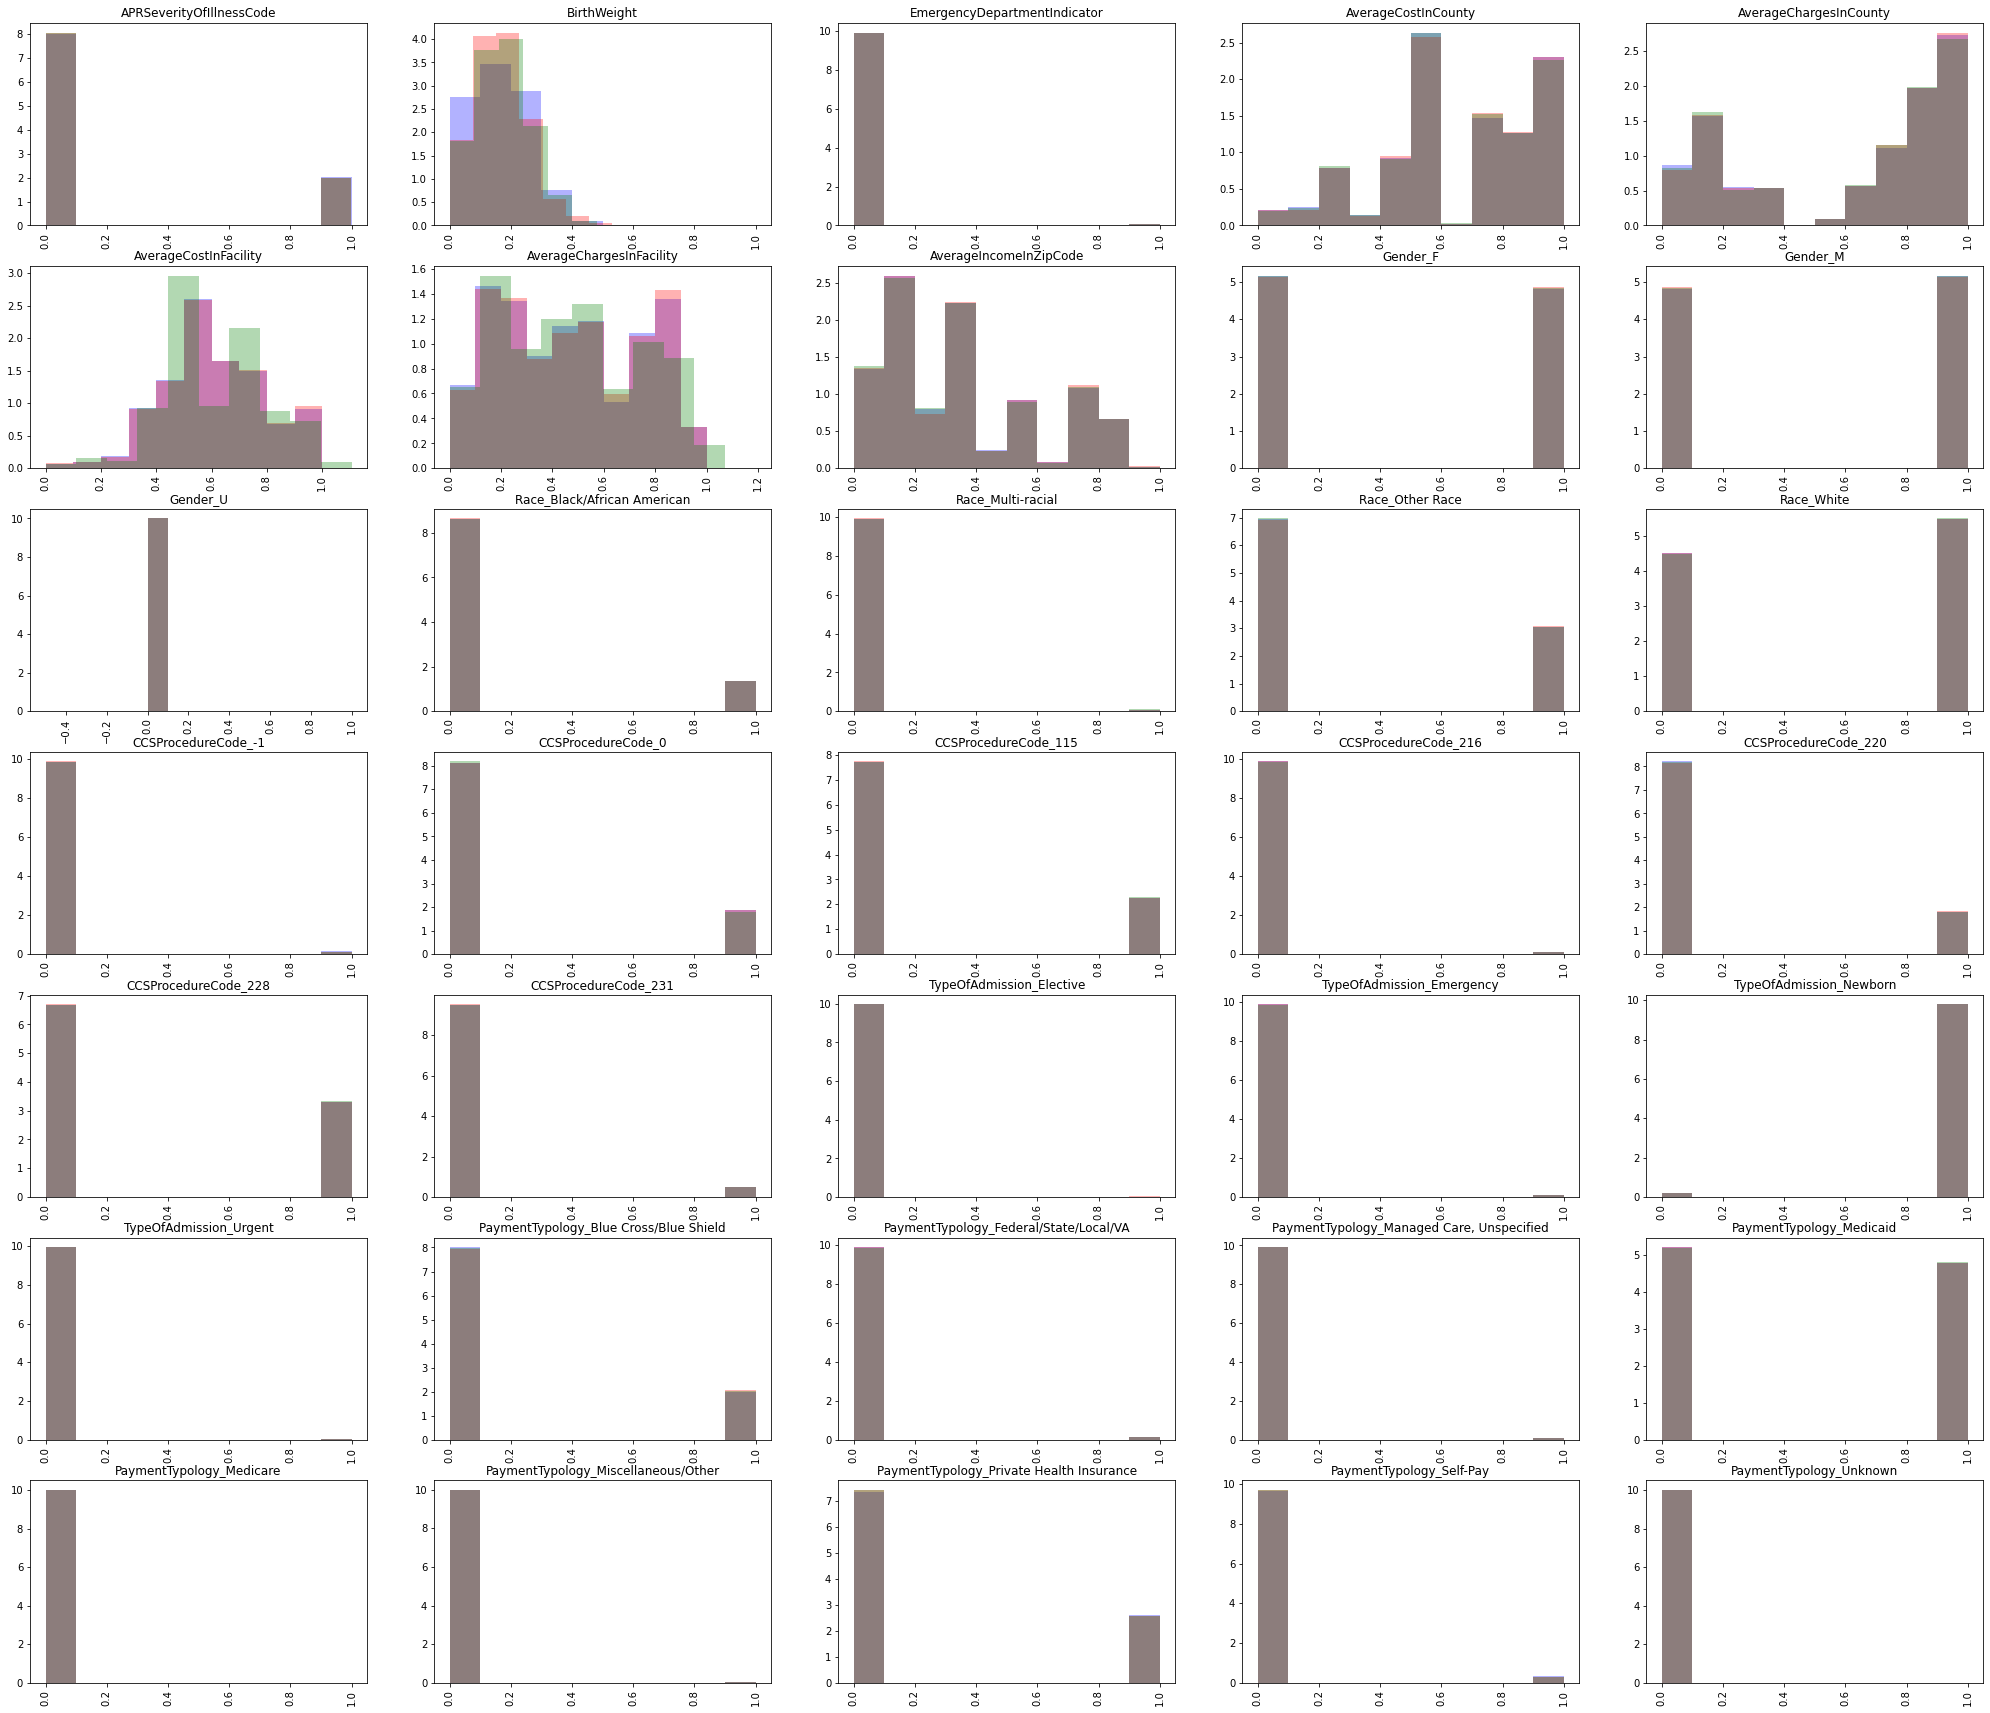

In [49]:
plt.figure(figsize=(35,35))
for i, col in enumerate(train_scaled_hospitalData_X.columns):
    plt.subplot(8,5,i+1)
    plt.hist(train_scaled_hospitalData_X[col], alpha=0.3, color='b', density=True)
    plt.hist(test_scaled_hospitalData_X[col], alpha=0.3, color='r', density=True)
    plt.hist(val_scaled_hospitalData_X[col], alpha=0.3, color='g', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

All sets are fairly equal in distribution, Gender U is okay to have larger disparity as it is a singular entity in the data.

Having successfully split out data we will convert each data set to numpy arrays

In [50]:
train_X = train_scaled_hospitalData_X.to_numpy()
train_y = train_hospitalData_Y

test_X = test_scaled_hospitalData_X.to_numpy()
test_y = test_hospitalData_Y

val_X = val_scaled_hospitalData_X.to_numpy()
val_y = val_hospitalData_Y

In [51]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Setting up graphing for the model

In [52]:
import graphviz 

def get_tree_2_plot(clf):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=hospitalData_X.columns,  
                      class_names=class_labels,  
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data) 
    return graph

Here we train and run predictions on the model using all data

In [53]:
from sklearn.metrics import f1_score

def get_acc_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = f1_score(train_y, train_pred, average='macro')
    val_acc = f1_score(val_y, val_pred, average='macro')
    
    return train_acc, val_acc

The data is then fit against the tree with a depth of 3. We are using a depth of 3 to prevent overtuning.

In [54]:
from sklearn import tree

tree_max_depth = 3   #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(train_X, train_y)

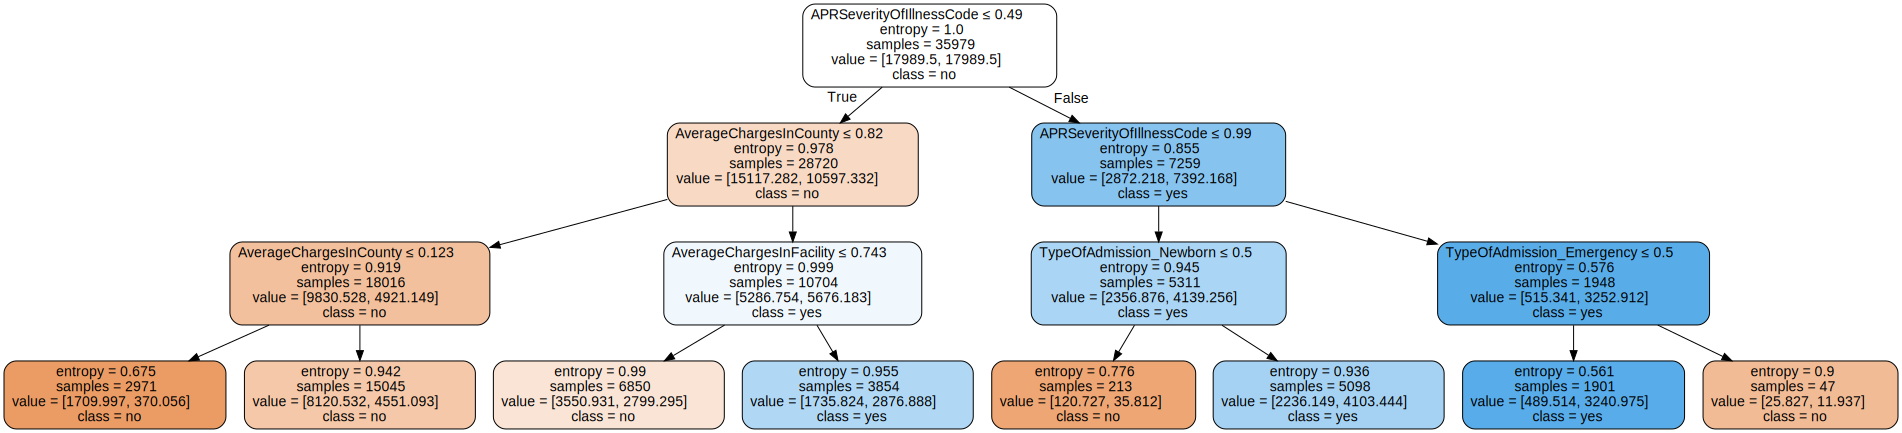

In [55]:
Dtree = get_tree_2_plot(clf)
Dtree

In [56]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.612
Validation f1 score: 0.605


We've obtained our f1 and f1 validation scores. Based on the 0.612 or 61.2% accuracy, I'll be hypertuning using gridsearch with depth and min samples split parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,400, 25), 'min_samples_split':np.arange(2,1000,5)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(train_X, train_y)

In [ ]:
pd.DataFrame(Gridclf.cv_results_)

In [ ]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

In [ ]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Now that hyper tuning is complete (Several iterations and configurations used until best results emerge) we can take our resultant f1 score and validation f1 scores and post prune to see if we overtuned.

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, n_estimators=500, class_weight='balanced_subsample', random_state=0)
clf.fit(train_X, train_y)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=500, random_state=0)

In [58]:
train_acc, val_acc = get_acc_scores(clf, train_X, train_y, val_X, val_y)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

Train Accuracy score: 0.638
Validation Accuracy score: 0.624


Now that tuning has been completed, the model will one with  a 63.8% f1, and 62.4% validation f1
The real data will be read in and predictions run on it

In [120]:
officialData = pd.read_csv('./test_data.csv', delimiter=',')

In [121]:
print(officialData)

          ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0          1     New York City      F              Other Race         Newborn   
1          2     New York City      F                   White         Newborn   
2          3     New York City      M            Multi-racial         Newborn   
3          4     New York City      M              Other Race         Newborn   
4          5     New York City      F              Other Race         Newborn   
...      ...               ...    ...                     ...             ...   
69172  69173     Hudson Valley      M  Black/African American         Newborn   
69173  69174     Hudson Valley      M              Other Race         Newborn   
69174  69175     Hudson Valley      M              Other Race         Newborn   
69175  69176     Hudson Valley      M  Black/African American         Newborn   
69176  69177     Hudson Valley      M                   White         Newborn   

       CCSProcedureCode  AP

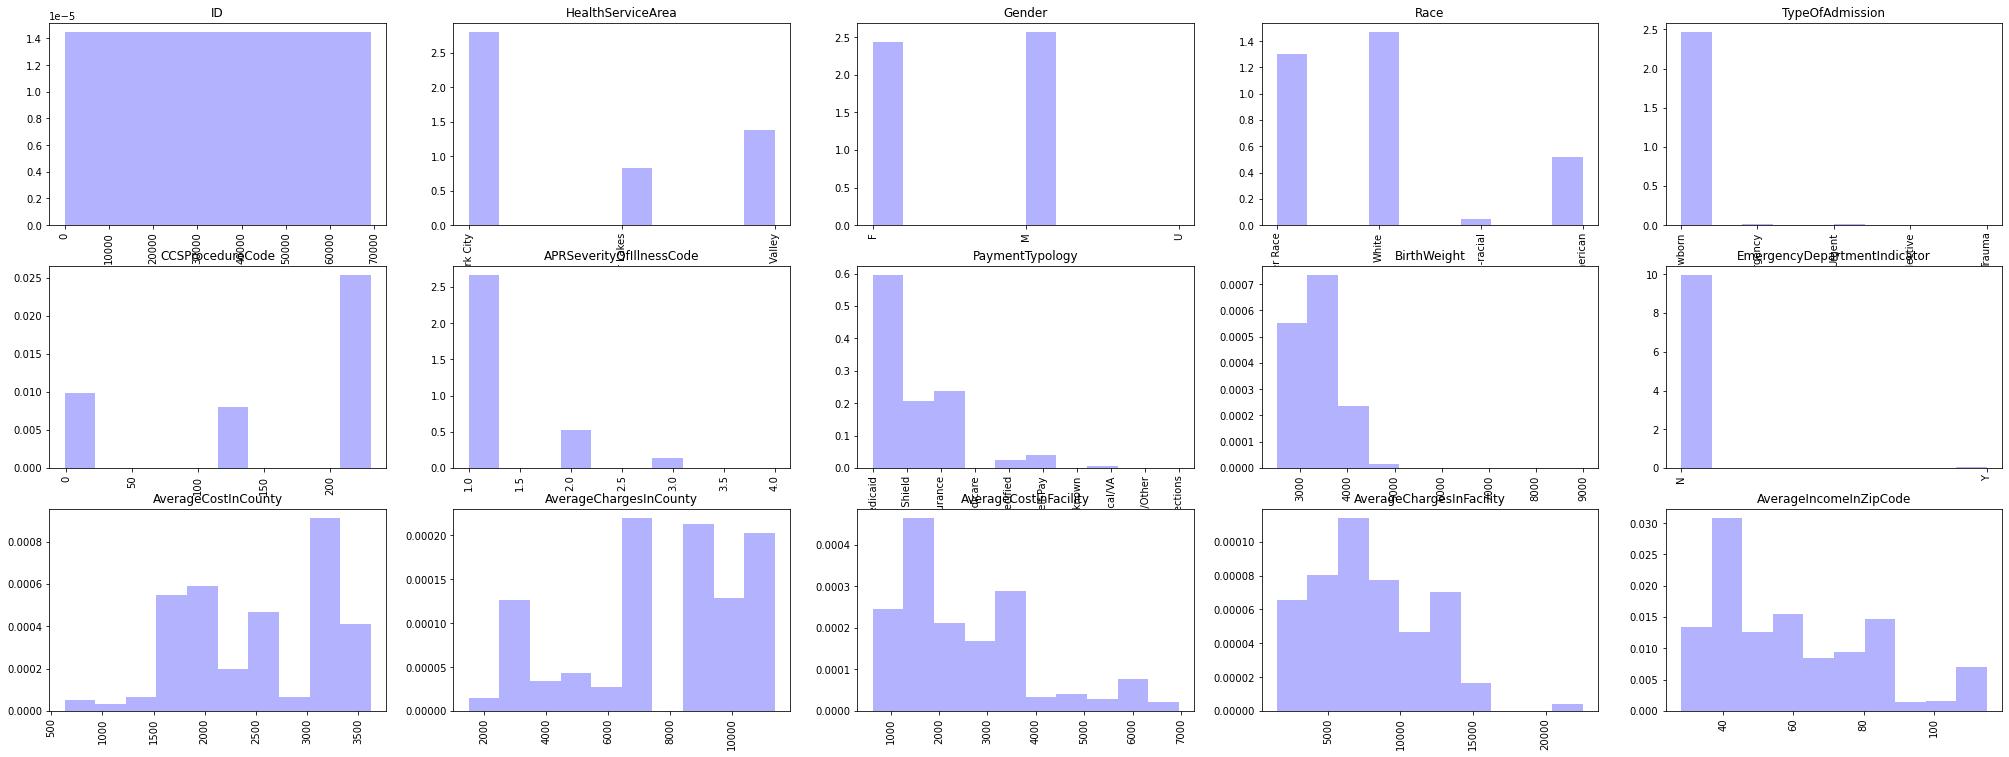

In [122]:
plt.figure(figsize=(35,35))
for i, col in enumerate(officialData.columns):
    plt.subplot(8,5,i+1)
    plt.hist(officialData[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

Both type of admission and payment typology have 2 new added columns. Due to these data points not existing in the model a conflict is created and the data cannot be used to form predictions. Hence I will be removing these points from the input data.
I will also be using identical pre-processing methods that were used to clean the categorical data in the EDA to get the input data in the right state.

In [123]:
officialData['EmergencyDepartmentIndicator'] = officialData['EmergencyDepartmentIndicator'].replace('Y', 1)
officialData['EmergencyDepartmentIndicator'] = officialData['EmergencyDepartmentIndicator'].replace('N', 0)
officialData = officialData[officialData.TypeOfAdmission != 'Trauma']
officialData = officialData[officialData.PaymentTypology != 'Department of Corrections']
data_ids = officialData['ID']
officialData = officialData.drop(['HealthServiceArea'], axis=1)

In [124]:
officialData = officialData.drop(['ID'], axis=1)

In [125]:
OneHotEncoder_Gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Gender.fit(officialData[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(officialData[['Gender']]).toarray()

print(onehot_.shape, OneHotEncoder_Gender.categories_)

(69164, 3) [array(['F', 'M', 'U'], dtype=object)]


In [126]:
colName = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    officialData[colName + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]

In [127]:
officialData = officialData.drop(['Gender'], axis=1)

In [128]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Race.fit(officialData[['Race']])

onehot_ = OneHotEncoder_Race.transform(officialData[['Race']]).toarray()

print(onehot_.shape, OneHotEncoder_Race.categories_)

(69164, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]


In [129]:
colName = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    officialData[colName + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]

In [130]:
officialData = officialData.drop(['Race'], axis=1)

In [131]:
OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_CCSProcedureCode.fit(officialData[['CCSProcedureCode']])

onehot_ = OneHotEncoder_CCSProcedureCode.transform(officialData[['CCSProcedureCode']]).toarray()

print(onehot_.shape, OneHotEncoder_CCSProcedureCode.categories_)

(69164, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]


In [132]:
colName = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    officialData[colName + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]

In [133]:
officialData = officialData.drop(['CCSProcedureCode'], axis=1)

In [134]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_TypeOfAdmission.fit(officialData[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(officialData[['TypeOfAdmission']]).toarray()

print(onehot_.shape, OneHotEncoder_TypeOfAdmission.categories_)

(69164, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


In [135]:
colName = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    officialData[colName + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]

In [136]:
officialData = officialData.drop(['TypeOfAdmission'], axis=1)

In [137]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_PaymentTypology.fit(officialData[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(officialData[['PaymentTypology']]).toarray()

print(onehot_.shape, OneHotEncoder_PaymentTypology.categories_)

(69164, 9) [array(['Blue Cross/Blue Shield', 'Federal/State/Local/VA',
       'Managed Care, Unspecified', 'Medicaid', 'Medicare',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay',
       'Unknown'], dtype=object)]


In [138]:
colName = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    officialData[colName + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]

In [139]:
officialData = officialData.drop(['PaymentTypology'], axis=1)

Now that all of the data has been cleaned up, we can run a prediction using the output data. Due to removing some data id will be matched up against each prediction to accurately predict each id point.

In [141]:
test_predictions_Y = clf.predict(officialData)
output_data = pd.DataFrame({'ID': data_ids, 'LengthOfStay': test_predictions_Y})
output_data.to_csv('s3722163_predictions.csv', index=False)


The data has now been predicted and output into a csv file. Based on all of the categorical inputs and the way LengthOfStay is classed on output, I believe using a tree approach to be the best possible one for this assignment. For the tree approach using a RandomForestClassifier seemed best as it could randomly create and prune branches of data until an optimal result is created. This seemed ideal for gaining a data accuracy of predictions. For real world applications however an approximately 63-64% accuracy wouldn't be considered strong enough to be a final solution for predictions, though the model would be useful for getting a general idea on expected output. I believe the model is limited largely by the ability to run deeper and more in depth calculations. By being able to hyper tune with larger variables such as higher max depth and smaller steps a better optimal set of tunings could be found to increase the accuracy further. 

I expect my predictions to score in the 60% region of accuracy based on all the validation run so far. 